In [1]:
import warnings
warnings.filterwarnings('ignore')
import yaml
import pandas as pd

In [2]:
from multi_agents import MultiAgentSystem

In [3]:
with open("/Users/sigmoid/Downloads/llm_keys.yaml", "r") as f:
    llm_keys = yaml.safe_load(f)

In [4]:
file_path = '/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot/src'

In [5]:
# Load data (MODIFIED for new structure)
df_expenses = pd.read_csv(f"{file_path}/data/Expense.csv")

In [6]:
# Convert to correct format
df_expenses["Expense"] = (
    df_expenses["Expense"]
    .str.replace(",", "", regex=False)
    .astype(float)
    .astype(int)
)

In [7]:
df_expenses.head()

,Country,Year,Month,Category,Brand,Data Type,Tier 1,Tier 2,Tier 3,Expense,Status,Count
0,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Agency Fees,Creative Agency Fees,125,Approved,1
1,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Agency Fees,Media Agency Fees,20603,Approved,1
2,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Agency Fees,Social Media/Influence Marketing,847,Approved,1
3,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Insight,Advanced Analytics,39123,Approved,1
4,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Insight,Consumer Tracking,1951,Approved,1


In [8]:
df_budget = pd.read_csv(f"{file_path}/data/Budget.csv")

In [9]:
# Handle budget data type conversion if needed
if "Historical - Budget" in df_budget.columns:
    df_budget["Historical - Budget"] = (
        df_budget["Historical - Budget"].str.replace(",", "", regex=False).astype(float).astype(int)
    )
if "Current - Budget" in df_budget.columns:
    df_budget["Current - Budget"] = (
        df_budget["Current - Budget"].str.replace(",", "", regex=False).astype(float).astype(int)
    )

In [10]:
df_budget.head()

,Country,Tier 1,Tier 2,Tier 3,Historical - Split (%),Current - Split (%),Historical - Budget,Current - Budget
0,Mexico,Pull-Non-Working,Ad Production,Digital Ad Production,0.0000,0.0000,0,0
1,Mexico,Pull-Non-Working,Ad Production,Other Ad Production,0.0000,0.0000,0,0
2,Mexico,Pull-Non-Working,Ad Production,TV Print Radio OOH Prod,0.0030,0.0030,375924,389021
3,Mexico,Pull-Non-Working,Agency Fees,Creative Agency Fees,0.0000,0.0000,0,0
4,Mexico,Pull-Non-Working,Agency Fees,In Store and POS Design/Development,0.0015,0.0015,187962,194511


In [11]:
multi_agent_obj = MultiAgentSystem(
    model_name='gpt-4o',
    api_key=llm_keys['open_ai'],
    expense_dataset=df_expenses,
    budget_dataset=df_budget,
    plot_path='jupyter_plots',
)

In [12]:
question = 'What are the Tier 1 expenses in 2024 for Brazil?'
question = "How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?"

In [13]:
result = multi_agent_obj.graph.nodes['supervisor'].invoke(
    {
        'question': question
    }
)

In [14]:
result

{'result': {'thought_process': 'The user is asking for a comparison of Tier 1 expenses for the current year (CY) for the Pepsi brand in Mexico and Brazil. This requires analyzing expense data across two countries and comparing them, which falls under the capabilities of the Insight Agent.',
  'next': 'Insight Agent',
  'enriched_question': 'Compare Tier 1 expenses for the current year for the Pepsi brand in Mexico and Brazil.'},
 'messages': [AIMessage(content='The user is asking for a comparison of Tier 1 expenses for the current year (CY) for the Pepsi brand in Mexico and Brazil. This requires analyzing expense data across two countries and comparing them, which falls under the capabilities of the Insight Agent.', additional_kwargs={}, response_metadata={}, name='supervisor')],
 'next': 'Insight Agent'}



> Entering new AgentExecutor chain...

Invoking: `analyze_expense_data` with `Compare Tier 1 expenses for the current year for the Pepsi brand in Mexico and Brazil.`


Segments are: {'approach': 'To answer this question, I will need to:\n1. Determine the current year by finding the maximum value in the "Year" column.\n2. Filter the dataset for the current year, the "PEPSI" brand, and the countries "Mexico" and "Brazil".\n3. Group the filtered data by "Country" and "Tier 1" and sum the "Expense" for each group.\n4. Compare the expenses for each "Tier 1" category between Mexico and Brazil.\n5. Visualize the comparison using a bar chart to show the expenses for each "Tier 1" category in both countries.', 'code': "import pandas as pd\n\n# Determine the current year\ncurrent_year = df['Year'].max()\n\n# Filter the data for the current year, PEPSI brand, and countries Mexico and Brazil\nfiltered_df = df[(df['Year'] == current_year) & \n                 (df['Brand'].str.strip().str.upper() 

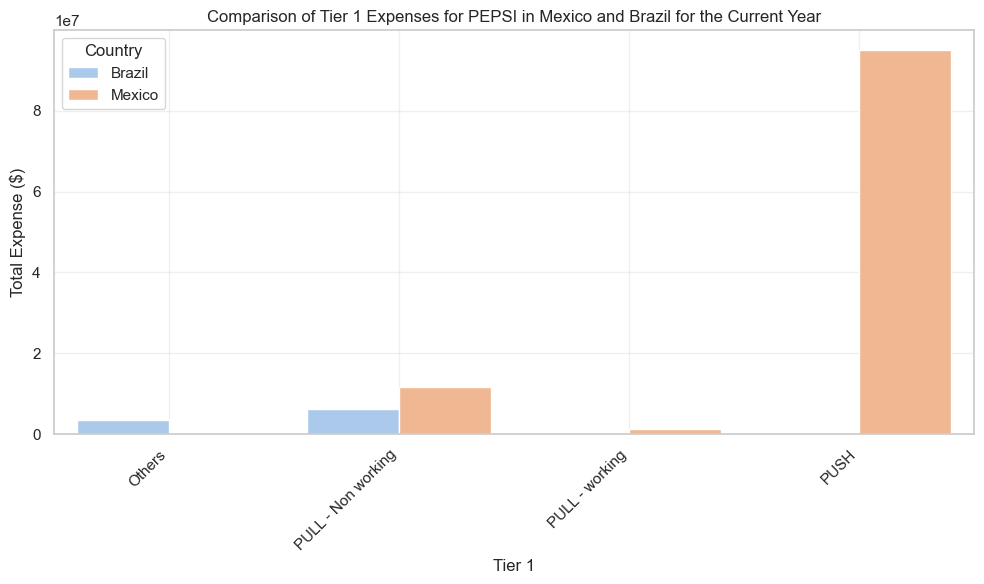

In [15]:
result2 = multi_agent_obj.graph.nodes['Insight Agent'].invoke(
    {
        'enriched_question': result['result']['enriched_question']
    }
)



> Entering new AgentExecutor chain...

Invoking: `analyze_expense_data` with `Calculate the total Tier 1 expenses for Brazil in 2024, grouped by Tier 1 category.`


Segments are: {'approach': 'To answer this question, I will need to:\n1. Filter the dataset for rows where the "Country" is "Brazil" and the "Year" is 2024.\n2. Convert the "Expense" column to a numeric type to ensure proper aggregation.\n3. Group the filtered data by the "Tier 1" column.\n4. Calculate the total expenses for each "Tier 1" category.\n5. Return the results as a dictionary with "Tier 1" categories as keys and total expenses as values.', 'code': "import pandas as pd\n\n# Assuming df is the input dataframe\n# Filter for Brazil and Year 2024\ndf_filtered = df[(df['Country'].str.strip().str.upper() == 'BRAZIL') & (df['Year'] == 2024)]\n\n# Convert Expense to numeric\ndf_filtered['Expense'] = df_filtered['Expense'].str.replace(',', '').astype(float)\n\n# Group by Tier 1 and calculate total expenses\ntier1_expense

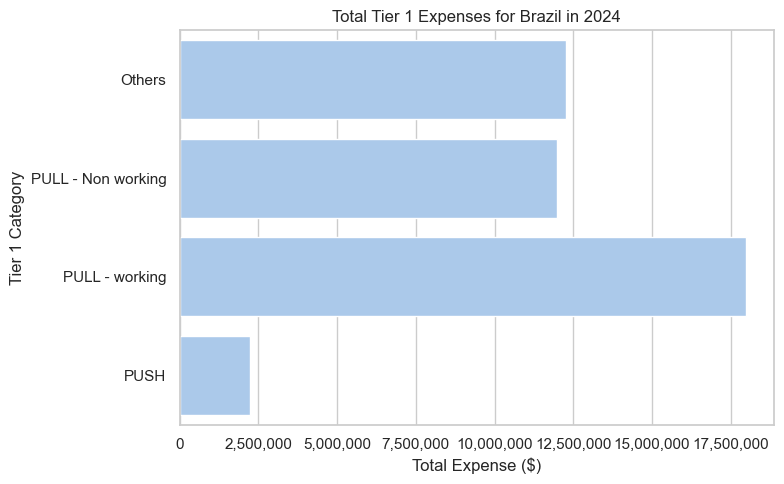

In [18]:
result3 = multi_agent_obj.graph.invoke(
    {
        'question': question
    }
)

In [20]:
result3

{'result': {'thought_process': 'The user has received a detailed breakdown of Tier 1 expenses for Brazil in 2024, grouped by category. There is no further question or request for analysis from the user at this point. Therefore, the conversation can be concluded.',
  'next': 'FINISH',
  'enriched_question': 'The total Tier 1 expenses for Brazil in 2024, grouped by Tier 1 category, are as follows: - Others: $12,253,120 - PULL - Non working: $11,988,603 - PULL - working: $17,973,874 - PUSH: $2,238,487'},
 'messages': [AIMessage(content='The user has received a detailed breakdown of Tier 1 expenses for Brazil in 2024, grouped by category. There is no further question or request for analysis from the user at this point. Therefore, the conversation can be concluded.', additional_kwargs={}, response_metadata={}, name='supervisor')],
 'next': 'FINISH'}